In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
df = pd.read_csv('./data/sample_positive_emotion.csv')
df

,ad,pos_emo
0,see why everyone is celebrating at hoblit dodg...,1
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,1
3,we have until march 31st to raise money for ou...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
145,Let's build Cameroon. Wake up Cameroonians and...,1
146,Studies show that 98% of all children possess ...,1
147,If you're a developer who wants to make a diff...,1
148,Learn the greatest tips & tricks from the worl...,1


In [3]:
# creating prediction model

# creating the filters 
filters =  [  'advantage', 'delighted', 'ecstatic', 'effective', 'freedom', 'guaranteed', 'relaxed', 'assured', 'happy', 'healthy',
                 'fulfilled', 'genuine', 'authentic','sure', 'secure', 'stable', 'honest', 'truthful','supportive', 'excellent', 'responsible', 
                'blissful', 'joyous', 'delighted', 'guarantee', 
                 'overjoyed', 'gleeful', 'thankful', 'festive', 'ecstatic', 'satisfied', 'cheerful','sunny', 'elated', 'jubilant', 
                 'jovial', 'fun-loving', 'lighthearted', 'glorious', 'innocent', 'child-like', 'gratified', 'euphoric', 'playful', 
                 'courageous', 'energetic', 'liberated', 'optimistic', 'frisky', 'animated', 'spirited','thrilled', 'wonderful', 'funny', 
                 'intelligent', 'exhilarated', 'spunky', 'youthful', 'vigorous', 'tickled', 'creative', 'constructive', 
                  'comfortable', 'pleased', 'encouraged', 'surprised', 'content', 'serene', 'bright', 'blessed', 'vibrant', 
                 'bountiful','glowing','relaxing','pleasing','fulfilling','good quality','compassion','astonished','glad','appreciative', 'joyful', 'pleased', 
                 'confident', 'cheery', 'polite', 'chilly','glory','brave', 'heroic', 'enthusiastic', 'passionate','optimistic','delighted', 'excited', 'amazing','amusing',
                  'innovative', 'artistic','authentic' 'supportive', 'excellent','blissful', 'joyous', 'delighted', 'overjoyed', 'gleeful', 'thankful'
            ]

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.673
                     precision    recall  f1-score   support

no positive emotion       0.72      0.86      0.78       102
   positive emotion       0.48      0.27      0.35        48

           accuracy                           0.67       150
          macro avg       0.60      0.57      0.56       150
       weighted avg       0.64      0.67      0.64       150

confusion matrix:
[[88 14]
 [35 13]]



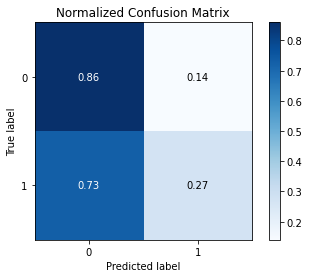

In [4]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['pos_emo'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['pos_emo'], y_pred, target_names=['no positive emotion', 'positive emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['pos_emo'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['pos_emo'], y_pred, normalize=True)
plt.show()